### Imports

In [1]:
import matplotlib as mpl
# mpl.use('TkAgg') # Use this backend for displaying plots in window
# mpl.use('Agg') # Use this backend for writing plots to file

import matplotlib.pyplot as plt
# plt.style.use('seaborn-talk')
mpl.rcParams['figure.figsize'] = [16, 9]
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Computer Modern Roman'
mpl.rcParams['lines.linewidth'] = 1.25
mpl.rcParams['lines.markersize'] = 6
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import h5py
import sys
import os
import time as TIME
import multiprocessing as mprocs
from threading import Thread
from subprocess import Popen, PIPE
from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import zip_longest
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import cm 
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
from numba import jit

### Create Dataspace 

In [14]:
# N = 2**np.arange(4, 9)
N = [64, 128, 256, 512]

# alpha = np.append(np.append(np.arange(0.0, 1.0, 0.05), np.arange(1.0, 2.0, 0.025)), np.arange(2.0, 2.5, 0.05))
alpha = np.arange(0.0, 3.5, 0.05)

k0    = 1
beta  = 0
iters = 400000
trans = 0
trans_al = 40000

#### Input / Output Directories

In [15]:
input_dir_ali  = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/Output/LCE"
output_dir     = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/Snapshots/Spectra"
input_dir_zer  = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/RESULTS"

### Plot

In [20]:
max_spec_al  = np.zeros((len(alpha), len(N)))
max_spec_alt = np.zeros((len(alpha), len(N)))
max_spec_zer = np.zeros((len(alpha), len(N)))

exp = 2
k   = k0
for n in range(0, len(N)):

    spectra_al  = np.zeros((len(alpha), int(N[n] / 2 - k0)))  
    spectra_alt = np.zeros((len(alpha), int(N[n] / 2 - k0)))    
    spectra_zer = np.zeros((len(alpha), int(N[n] / 2 - k0)))    

    for a in range(0, len(alpha)):

        # Read in data
        filename_al  = "/LCE_Runtime_Data_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[ALIGNED]_ITERS[{}].h5".format(N[n], k, alpha[a], beta, iters)
        filename_zer = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(N[n], k, alpha[a], beta, "ZERO", iters, trans)
        filename_alt = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(N[n], k, alpha[a], beta, "ALIGNED", iters, trans_al)
        file_al  = h5py.File(input_dir_ali + filename_al, 'r')
        file_alt = h5py.File(input_dir_zer + filename_alt, 'r')
        file_zer = h5py.File(input_dir_zer + filename_zer, 'r')

        # Extract LCE Data
        lce_al  = file_al['LCE']
        lce_zer = file_zer['LCE']
        lce_alt = file_alt['LCE']

        # Extract final state
        spectrum_al  = lce_al[-1, :]
        spectrum_alt = lce_alt[-1, :]
        spectrum_zer = lce_zer[-1, :]
        spectra_al[a, :]  = spectrum_al
        spectra_zer[a, :] = spectrum_zer

        max_spec_al[a, n]   = lce_al[-1, exp]
        max_spec_alt[a, n] = lce_alt[-1, exp]
        max_spec_zer[a, n]  = lce_zer[-1, exp]

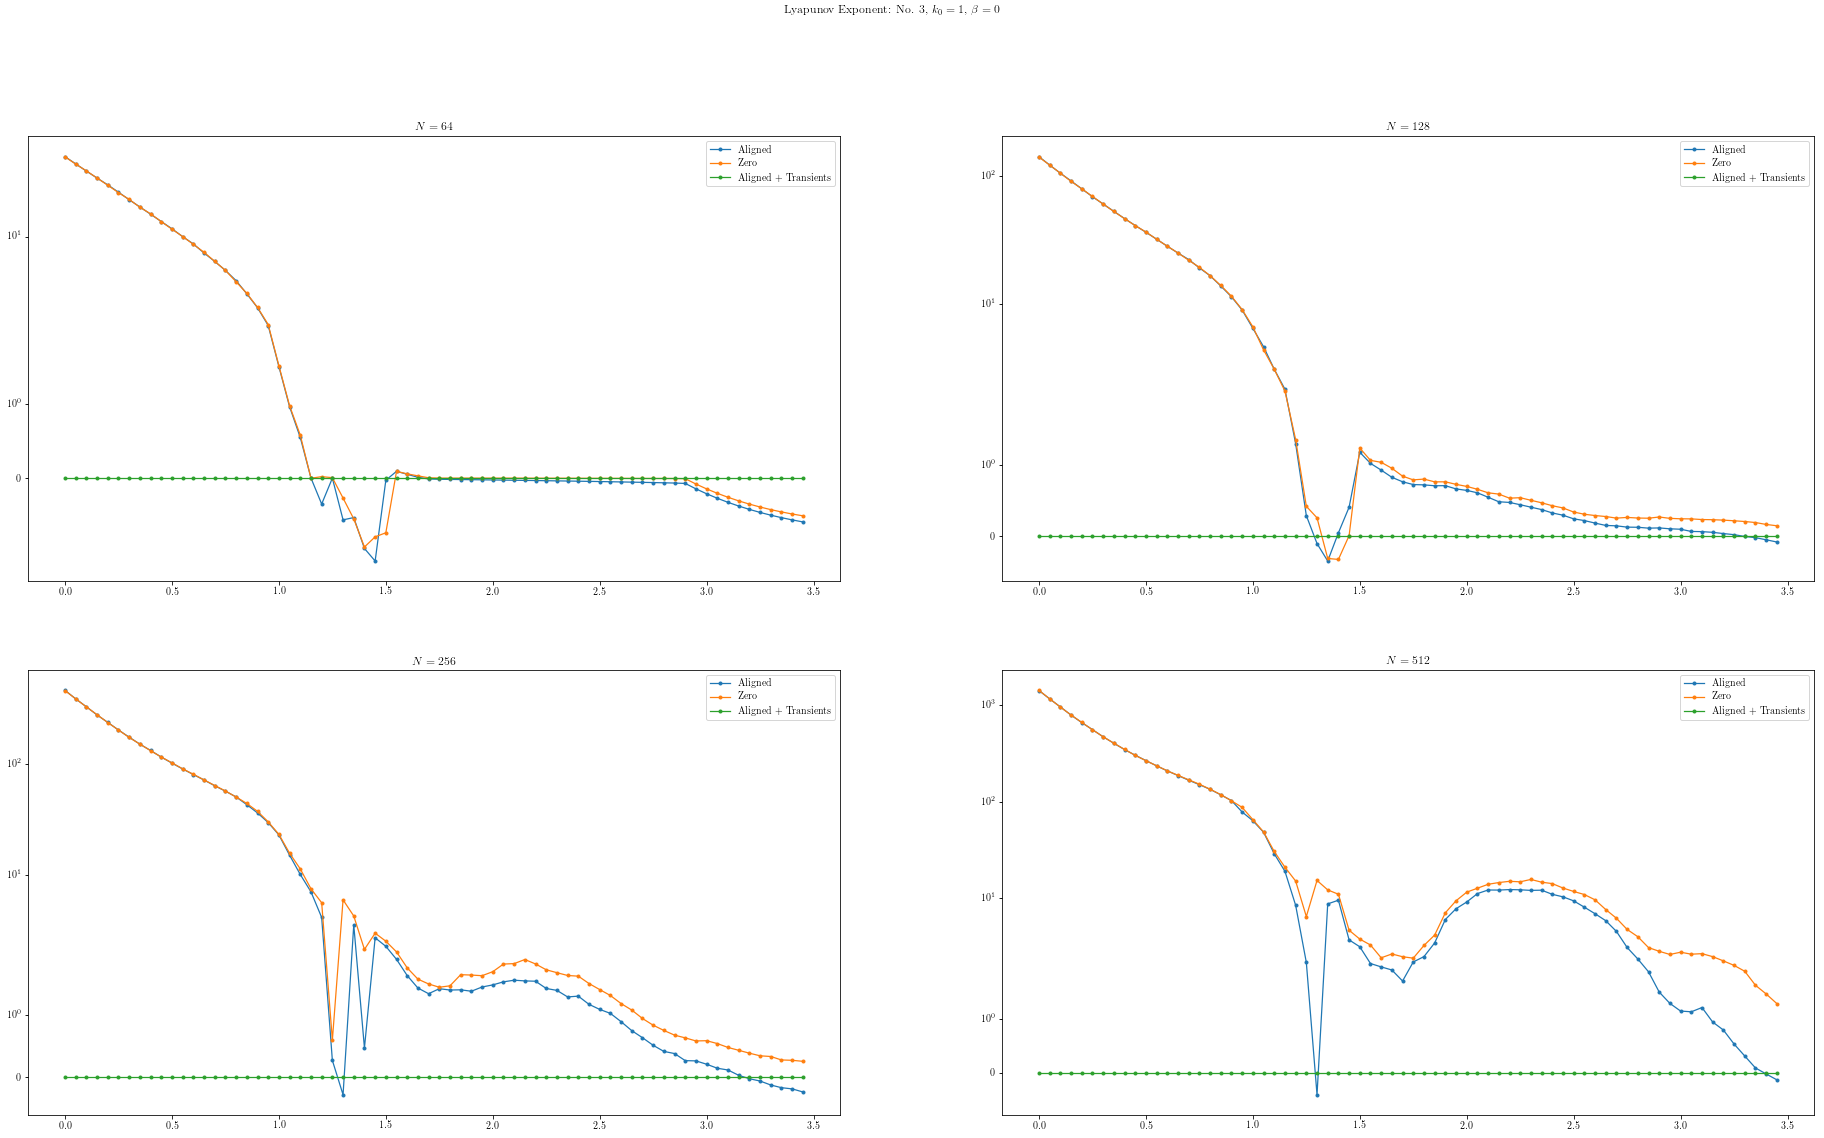

In [21]:
## CREATE FIGURE
fig = plt.figure(figsize = (32, 18), tight_layout = False)
gs  = GridSpec(2, 2)

for i, p in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
    ax = fig.add_subplot(gs[p])
    ax.plot(alpha, max_spec_al[:, i], '.-')
    ax.plot(alpha, max_spec_zer[:, i], '.-')
    ax.plot(alpha, max_spec_alt[:, i], '.-')
    ax.legend([r"Aligned", r"Zero", r"Aligned + Transients"])
    ax.set_title(r"$N = {}$".format(N[i]))
    ax.set_yscale('symlog')
    
plt.suptitle(r"Lyapunov Exponent: No. {}, $k_0 = {}$, $\beta = {}$".format(exp + 1, k0, beta))
plt.show()

In [18]:
print(max_spec_zer)

filename_zer = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(64, k0, 1.5, beta, "ZERO", iters, trans)
file_zer     = h5py.File(input_dir_zer + filename_zer, 'r')

# Extract LCE Data
lce_zer = file_zer['LCE']

print(lce_zer[-1, exp])


filename_zer = "/RESULTS_N[{}]_k0[{}]_ALPHA[{:0.3f}]_BETA[{:0.3f}]_u0[{}]/LCEData_ITERS[{}]_TRANS[{}].h5".format(64, k0, 1.5, beta, "ZERO", iters, trans)
file_zer     = h5py.File(input_dir_zer + filename_zer, 'r')

# Extract LCE Data
lce_zer = file_zer['LCE']

[[5.24521771e+01 1.68791845e+02 5.20335796e+02 1.57558345e+03]
 [4.65899079e+01 1.47226401e+02 4.41824023e+02 1.29837559e+03]
 [4.15558194e+01 1.28299049e+02 3.77926656e+02 1.07126111e+03]
 [3.71178132e+01 1.12358686e+02 3.22828537e+02 8.99887703e+02]
 [3.31132809e+01 9.83446241e+01 2.77791743e+02 7.53704550e+02]
 [2.96154807e+01 8.64892700e+01 2.38863088e+02 6.38459982e+02]
 [2.65571107e+01 7.64923857e+01 2.08054233e+02 5.46584109e+02]
 [2.36887249e+01 6.75132375e+01 1.82728449e+02 4.67734220e+02]
 [2.12969845e+01 6.05964772e+01 1.60337677e+02 4.09626276e+02]
 [1.88982802e+01 5.37420305e+01 1.42052045e+02 3.56024810e+02]
 [1.68435137e+01 4.82621691e+01 1.26507165e+02 3.13580331e+02]
 [1.51184357e+01 4.30263923e+01 1.13218028e+02 2.79137915e+02]
 [1.34750308e+01 3.86679223e+01 1.00785389e+02 2.48582829e+02]
 [1.20422485e+01 3.44867641e+01 9.09485588e+01 2.21435522e+02]
 [1.04831157e+01 3.06579719e+01 8.14149025e+01 2.01117999e+02]
 [9.21559411e+00 2.71881269e+01 7.24112675e+01 1.800360

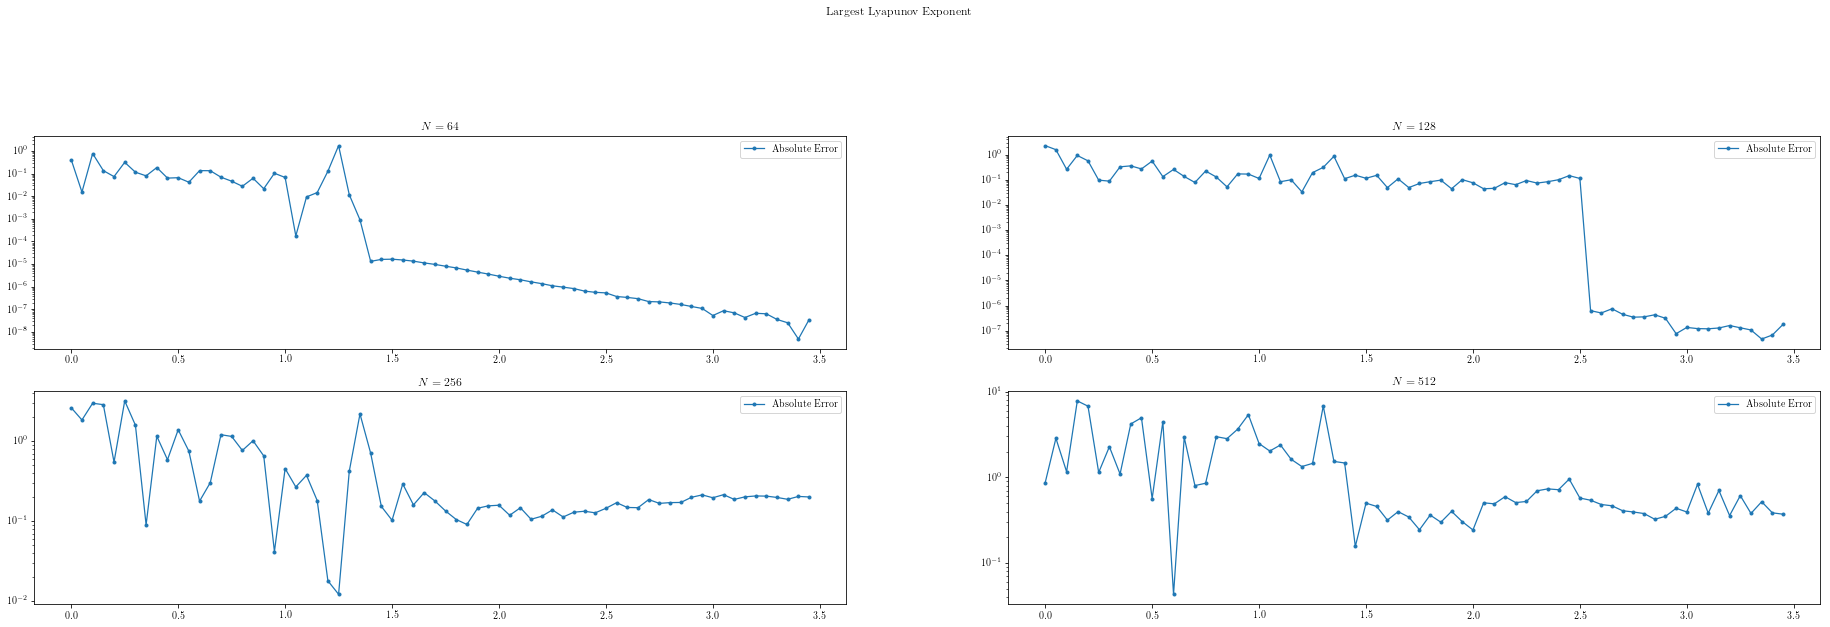

In [51]:
fig = plt.figure(figsize = (32, 18), tight_layout = False)
gs  = GridSpec(4, 2)

for i, p in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
    ax = fig.add_subplot(gs[p])
    ax.plot(alpha, np.absolute(max_spec_al[:, i] - max_spec_zer[:, i]), '.-')
    ax.legend([r"Absolute Error"])
    ax.set_title(r"$N = {}$".format(N[i]))
    ax.set_yscale('log')

plt.suptitle(r"Largest Lyapunov Exponent")
plt.show()